In [37]:
import pandas as pd
import numpy as np 
import geopandas as gpd
import json
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import re 
import matplotlib.pyplot as plt
import seaborn as sns 
import imageio

In [38]:
indexSheet  = pd.ExcelFile('../Data/DatamunDB.xlsx')
sheet_names = indexSheet.sheet_names

In [39]:
type(sheet_names)

list

In [40]:
print([x for x in sheet_names])

['070301_horas', '070102_PO', '070201_condición', '070101_PEA', '070401_TITULARES', '010201_Autonomia_financiera', '010202_Dependencia_aportaciones', '010203_Dependencia_participacio', '010204_deuda_ingresos_disponibl', '010108_estand_calidad', '010106_ind_desempenio', '010105_ind_gestion', '010110_mecanismo_Calidad', '010104_metas', '010101_misión', '010103_Objetivos', '010107_panel_control', '010109_quejas', '010102_Visión', '020201_RESP_CALLES_LIMP', '020202_CALLES_LIM_COBER_POB', '020101_Porcentaje_funcionamient', '020102_ALUM_COBER_POB', '020501_RESP_CALLES_MANTEN', '020502_CALLES_MAN_COBER_POB', '020601_Mercado_Funcionamiento', '020602_MERCADOS_COBER_POB', '020701_PANTEON_COBER_POB', '020801_Parques_Jardines', '020402_RASTROS_COBER_POB', '020401_RASTRO_FUNCIONAMIENTO', '020901_INFRA_SEG_P', '020301_TIANGUIS_COBER_POB', '030206_Carencia por acceso a la', '030203_Carencia por acceso a la', '030205_Carencia por acceso a lo', '030202_Carencia por acceso a lo', '030204_Carencia por ca

In [41]:
parquesData  = pd.read_excel('../Data/DatamunDB.xlsx',  sheet_name='040204_RZG_SERVICIO_SALUD')
parquesData.head()


,CICLO,ID_ESTADO,NOMBRE_ENTIDAD,ID_MUNICIPIO,NOMBRE_MUNICIPIO,TIPO_SEGREGACION,ESTIMADOR,PORCENTAJE,VALOR_NUMERICO,VALOR_DISCRETO
0,2010,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,22.39,NaN,NaN
1,2015,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,14.16,NaN,NaN
2,2020,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,18.25,NaN,NaN
3,2010,1,Aguascalientes,1002,Asientos,NaN,NaN,13.77,NaN,NaN
4,2015,1,Aguascalientes,1002,Asientos,NaN,NaN,5.54,NaN,NaN


In [42]:
indexData  = pd.read_excel('../Data/DatamunDB.xlsx',  sheet_name='050100_Coeficiente_Gini')
mapMun = gpd.read_file('../Data/mun23gw_c/mun23cw.shp')


In [43]:
razonIngreso = pd.read_excel('../Data/DatamunDB.xlsx',  sheet_name='030101_Población en situación d')
razonIngreso.head()

,CICLO,ID_ESTADO,NOMBRE_ENTIDAD,ID_MUNICIPIO,NOMBRE_MUNICIPIO,TIPO_SEGREGACION,ESTIMADOR,PORCENTAJE,VALOR_NUMERICO,VALOR_DISCRETO
0,2010,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,30.2,"242,317.00",NaN
1,2015,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,26.1,"224,949.00",NaN
2,2020,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,23.7,"218,414.00",NaN
3,2010,1,Aguascalientes,1002,Asientos,NaN,NaN,65.5,"31,694.00",NaN
4,2015,1,Aguascalientes,1002,Asientos,NaN,NaN,54.0,"25,169.00",NaN


In [44]:
autonomiaFinanciera = pd.read_excel('../Data/DatamunDB.xlsx', sheet_name='010201_Autonomia_financiera')
autonomiaFinanciera.head()

,CICLO,ID_ESTADO,NOMBRE_ENTIDAD,ID_MUNICIPIO,NOMBRE_MUNICIPIO,TIPO_SEGREGACION,ESTIMADOR,PORCENTAJE,VALOR_NUMERICO,VALOR_DISCRETO
0,2013,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,28.07,NaN,NaN
1,2014,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,27.57,NaN,NaN
2,2015,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,31.00,NaN,NaN
3,2016,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,30.73,NaN,NaN
4,2017,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,30.25,NaN,NaN


In [45]:
indexData.columns =   [x.lower() for x in  indexData.columns]
mapMun.columns =   [x.lower() for x in  mapMun.columns]

In [46]:
indexData.head()

,ciclo,id_estado,nombre_entidad,id_municipio,nombre_municipio,tipo_segregacion,estimador,porcentaje,valor_numerico,valor_discreto
0,2010,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,NaN,0.43,NaN
1,2015,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,NaN,0.39,NaN
2,2020,1,Aguascalientes,1001,Aguascalientes,NaN,NaN,NaN,0.38,NaN
3,2010,1,Aguascalientes,1002,Asientos,NaN,NaN,NaN,0.44,NaN
4,2015,1,Aguascalientes,1002,Asientos,NaN,NaN,NaN,0.37,NaN


In [47]:
mapMun.head()

,cvegeo,cve_ent,cve_mun,nomgeo,nom_ent,cov_,cov_id,area,perimeter,geometry
0,01008,01,008,San JosÃ© de Gracia,Aguascalientes,0,1,857.790574,181.537599,"POLYGON ((2453326.553 1143576.423, 2453363.324..."
1,01009,01,009,TepezalÃ¡,Aguascalientes,1,2,229.661012,89.329532,"POLYGON ((2481826.447 1149055.253, 2481589.221..."
2,01007,01,007,RincÃ³n de Romos,Aguascalientes,2,3,372.295163,161.749880,"POLYGON ((2476760.231 1150329.045, 2476783.634..."
3,01006,01,006,PabellÃ³n de Arteaga,Aguascalientes,3,4,195.735946,105.612997,"POLYGON ((2473996.656 1129304.114, 2474217.809..."
4,01005,01,005,JesÃºs MarÃ­a,Aguascalientes,4,5,499.895092,163.500811,"POLYGON ((2463657.764 1116053.82, 2463738.92 1..."


In [48]:
mapMun.crs

<Projected CRS: PROJCS["LCC_WGS_1984",GEOGCS["WGS 84",DATUM["WGS_1 ...>
Name: LCC_WGS_1984
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
indexData['id_municipio'] = indexData['id_municipio'].astype(str)
#indexData['id_municipio'] = '0' + indexData['id_municipio']
indexData['id_municipio'] = np.where(indexData['id_municipio'].apply(lambda x: len(x))==4, '0' + indexData['id_municipio'], indexData['id_municipio'] )


In [50]:
indexDataMap = pd.merge(indexData, mapMun, left_on='id_municipio', right_on='cvegeo')

In [51]:
indexDataMap.head

<bound method NDFrame.head of       ciclo  id_estado  nombre_entidad id_municipio       nombre_municipio  \
0      2010          1  Aguascalientes        01001         Aguascalientes   
1      2015          1  Aguascalientes        01001         Aguascalientes   
2      2020          1  Aguascalientes        01001         Aguascalientes   
3      2010          1  Aguascalientes        01002               Asientos   
4      2015          1  Aguascalientes        01002               Asientos   
...     ...        ...             ...          ...                    ...   
7363   2015         32       Zacatecas        32057               Trancoso   
7364   2020         32       Zacatecas        32057               Trancoso   
7365   2010         32       Zacatecas        32058  Santa María de la Paz   
7366   2015         32       Zacatecas        32058  Santa María de la Paz   
7367   2020         32       Zacatecas        32058  Santa María de la Paz   

     tipo_segregacion  estimador 

In [52]:
indexDataMap.columns

Index(['ciclo', 'id_estado', 'nombre_entidad', 'id_municipio',
       'nombre_municipio', 'tipo_segregacion', 'estimador', 'porcentaje',
       'valor_numerico', 'valor_discreto', 'cvegeo', 'cve_ent', 'cve_mun',
       'nomgeo', 'nom_ent', 'cov_', 'cov_id', 'area', 'perimeter', 'geometry'],
      dtype='object')

In [53]:
indexDataMap = gpd.GeoDataFrame(indexDataMap, crs=mapMun.crs)

In [54]:
mapMun = gpd.GeoDataFrame(mapMun)

In [55]:
indexDataMap.head()

,ciclo,id_estado,nombre_entidad,id_municipio,nombre_municipio,tipo_segregacion,estimador,porcentaje,valor_numerico,valor_discreto,cvegeo,cve_ent,cve_mun,nomgeo,nom_ent,cov_,cov_id,area,perimeter,geometry
0,2010,1,Aguascalientes,01001,Aguascalientes,NaN,NaN,NaN,0.43,NaN,01001,01,001,Aguascalientes,Aguascalientes,8,9,1166.359247,256.631026,"POLYGON ((2486536.885 1117403.247, 2487286.391..."
1,2015,1,Aguascalientes,01001,Aguascalientes,NaN,NaN,NaN,0.39,NaN,01001,01,001,Aguascalientes,Aguascalientes,8,9,1166.359247,256.631026,"POLYGON ((2486536.885 1117403.247, 2487286.391..."
2,2020,1,Aguascalientes,01001,Aguascalientes,NaN,NaN,NaN,0.38,NaN,01001,01,001,Aguascalientes,Aguascalientes,8,9,1166.359247,256.631026,"POLYGON ((2486536.885 1117403.247, 2487286.391..."
3,2010,1,Aguascalientes,01002,Asientos,NaN,NaN,NaN,0.44,NaN,01002,01,002,Asientos,Aguascalientes,7,8,543.374266,192.096428,"POLYGON ((2493552.647 1142361.087, 2493586.599..."
4,2015,1,Aguascalientes,01002,Asientos,NaN,NaN,NaN,0.37,NaN,01002,01,002,Asientos,Aguascalientes,7,8,543.374266,192.096428,"POLYGON ((2493552.647 1142361.087, 2493586.599..."


In [56]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colorbar as cbar
import matplotlib as mpl


In [57]:
bins = [0, 0.1, 0.2,  0.30, 0.4, 0.5, 0.6, float('inf')]
labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', 
          '0.6>']
indexDataMap['gini_category'] = pd.cut(
    indexDataMap['valor_numerico'], bins=bins, labels=labels, right=False
)


In [58]:
colors2 = ['#FED976', '#FD8D3C', '#F03B20', 
          '#BD0026', '#800026', '#54278F', '#2B8CBE', '#08519C', '#023858']
color_map = dict(zip(labels, colors2))


viridis_original=plt.colormaps.get_cmap('cividis')
viridis_reverse = viridis_original.reversed() 


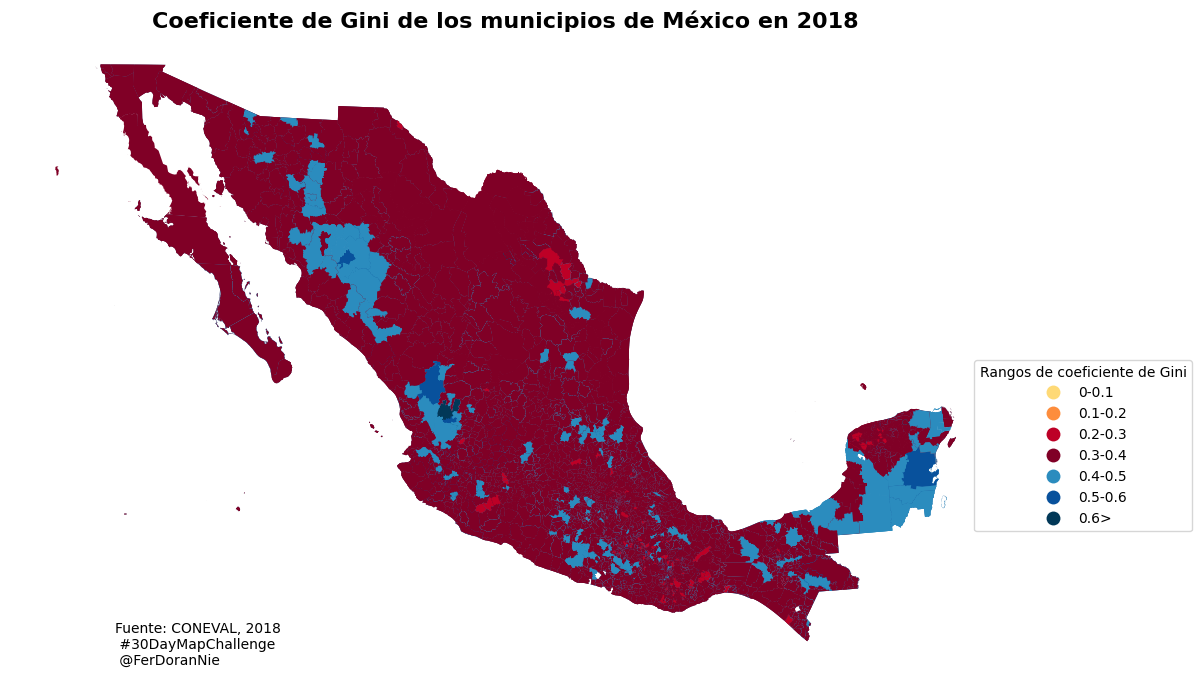

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Graficar usando las categorías y colores
indexDataMap.plot(
    column='gini_category',
    #cmap = viridis_original,
    cmap=mpl.colors.ListedColormap(colors2),  # Usar la paleta personalizada    
    legend=True,  # Mostrar leyenda
    edgecolor=None,
    linewidth=0.5,
    ax=ax
)

# Personalizar título, subtítulo y leyenda
ax.set_title("Coeficiente de Gini de los municipios de México en 2018", fontsize=16, weight='bold')
#ax.set_su
#fig.suptitle("Clasificación de Migración en Rangos de 5 en 5", fontsize=12)
ax.set_axis_off()

# Personalizar leyenda
legend = ax.get_legend()
legend.set_title("Rangos de coeficiente de Gini")
legend.set_bbox_to_anchor((1.2, 0.5))  # Mover la leyenda fuera del mapa
fig.text(0.1, 0.1, "Fuente: CONEVAL, 2018  \n #30DayMapChallenge \n @FerDoranNie", fontsize=10, ha='left')


output_path = "../images/coeficiente_de_gini_2018.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
# Mostrar el mapa
plt.tight_layout()
plt.show()


In [105]:
#geojsonPath = '../Data/gini_index_mexico_historical_municipality.geojson'
#indexDataMap.to_file(geojsonPath, driver="GeoJSON")

geojsonPath = '../Data/map_mexico_municipality.geojson'
mapMun.to_file(geojsonPath, driver = "GeoJSON")




In [107]:
filePath = '../Data/gini_index_municipality.csv'

indexData.to_csv(filePath, index=False)